# 1.7 Network graph visualization

    01. Imports/Libraries
    02. Load and Inspect Relationship Data
    03. Build NetworkX Graph
    04. Static Network Visualization (NetworkX)
    05. Graph visualization - Pyvis
    06. Community detection - Leiden algorithm
    07. Centrality Measures
        - Degree Centrality
        - Closeness Centrality
        - Betweenness Centrality
        - Save Centrality Measures to Graph
        - Observations

## 01. Imports/Libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

## 02. Load and Inspect Relationship Data

In [2]:
# Import 20th Century Country Relationship list

relationship_df = pd.read_csv(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\02_Data\Prepared_Data\country_relationships.csv"
)

In [3]:
# Work check
relationship_df.head()

,source,target,value
0,japan,united states,15
1,germany,united states,11
2,germany,united kingdom,10
3,france,united kingdom,6
4,united kingdom,united states,6


In [4]:
relationship_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  166 non-null    object
 1   target  166 non-null    object
 2   value   166 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.0+ KB


## 03. Build NetworkX Graph

In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## 04. Static Network Visualization (NetworkX)

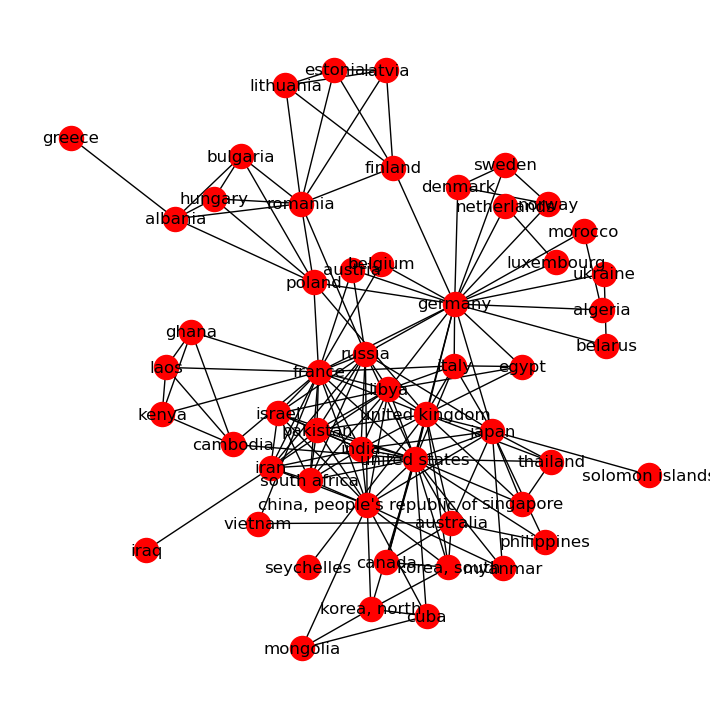

In [6]:
# Graph visualization - Networkx

h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [7]:
# Save visual

h.savefig(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\networkx_countries_static.png"
)

## 05. Graph visualization - Pyvis

In [8]:
# Create the PyVis network object
net = Network(
    notebook=True,
    width="900px",
    height="800px",
    bgcolor="#222222",
    font_color="white"
)

In [9]:
# Add node attributes (size based on degree)
node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

In [10]:
# Load the NetworkX graph into PyVis
net.from_nx(G)

In [11]:
# Enable controls and layout options
net.show_buttons(filter_=True)
net.repulsion()

In [12]:
# Save and display the interactive graph

net.show("countries_base.html")

countries_base.html


In [13]:
# Save visual

net.show(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\countries_base.html"
)

C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\countries_base.html


## 06. Community detection - Leiden algorithm

In [14]:
# Import
from cdlib import algorithms

# Run leiden algorithm on the graph
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'graph_tool', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [15]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [16]:
# Convert to node to community mapping

new_com = coms.to_node_community_map()
dict_com = {node: groups[0] for node, groups in new_com.items()}

In [17]:
# Add labels to graph

nx.set_node_attributes(G, dict_com, 'group')

In [18]:
# Visualize communities with PyVis

com_net = Network(
    notebook=True,
    width="1300px",
    height="700px",
    bgcolor="#222222",
    font_color="white"
)

com_net.from_nx(G)
com_net.show_buttons(filter_=True)
com_net.repulsion()
com_net.show(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\countries_communities_leiden.html"
)

C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\countries_communities_leiden.html


In [19]:
# Work check

com_net.show("countries_communities_leiden.html")

countries_communities_leiden.html


In [22]:
# strongest relationships
relationship_df.head(5)

,source,target,value
0,japan,united states,15
1,germany,united states,11
2,germany,united kingdom,10
3,france,united kingdom,6
4,united kingdom,united states,6


In [24]:
# Top 5 countries with the most edge counts
degree_counts = (
    pd.concat([relationship_df["source"], relationship_df["target"]])
    .value_counts()
    .reset_index()
)

degree_counts.columns = ["country", "degree"]
degree_counts.head(5)

,country,degree
0,united states,23
1,germany,21
2,france,20
3,united kingdom,16
4,"china, people's republic of",15


Looking at the community structure in the graph, it seems to be correct with historical events. Each community seems to be related to a conflict or war between the countries within the communities. Then there are the largest edges that connect to the top 5 countries, most likely connected to the World Wars. I went a bit further and did the 5 top edge counts and the top 5 strongest relationships. The top 5 for both match up to being involved with the World Wars.

## 07. Centrality Measures

#### Degree Centrality

In [25]:
# Calculate degree centrality
degree_dict = nx.degree_centrality(G)

In [26]:
# Convert to dataframe
degree_df = pd.DataFrame(
    degree_dict.items(),
    columns=['country', 'centrality']
)

In [27]:
# Sort by centrality score
degree_df.sort_values(
    by='centrality',
    ascending=False,
    inplace=True
)

In [29]:
# Limit to top 15 countries
top_degree_df = degree_df.head(15)

In [32]:
# Use a simple dark-to-light palette
colors = sns.color_palette("Blues_r", n_colors=len(top_degree_df))

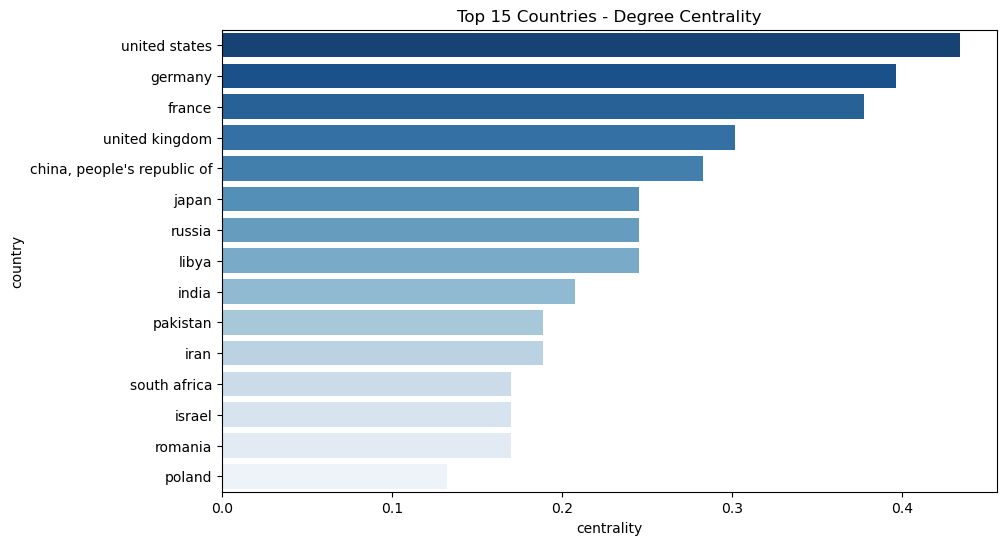

In [44]:
# Plot and save degree centrality
plt.figure(figsize=(10, 6))
sns.barplot(
    x="centrality",
    y="country",
    data=top_degree_df,
    palette=colors
).set_title("Top 15 Countries - Degree Centrality")
plt.savefig(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\degree_centrality.png",
    bbox_inches='tight'
)
plt.show()


#### Closeness Centrality

In [34]:
# Calculate closeness centrality
closeness_dict = nx.closeness_centrality(G)

In [35]:
# Convert to dataframe
closeness_df = pd.DataFrame(
    closeness_dict.items(),
    columns=['country', 'centrality']
)

In [36]:
# Sort by centrality
closeness_df.sort_values(
    by='centrality',
    ascending=False,
    inplace=True
)

In [37]:
# Limit to top 15 for readability
top_closeness_df = closeness_df.head(15)

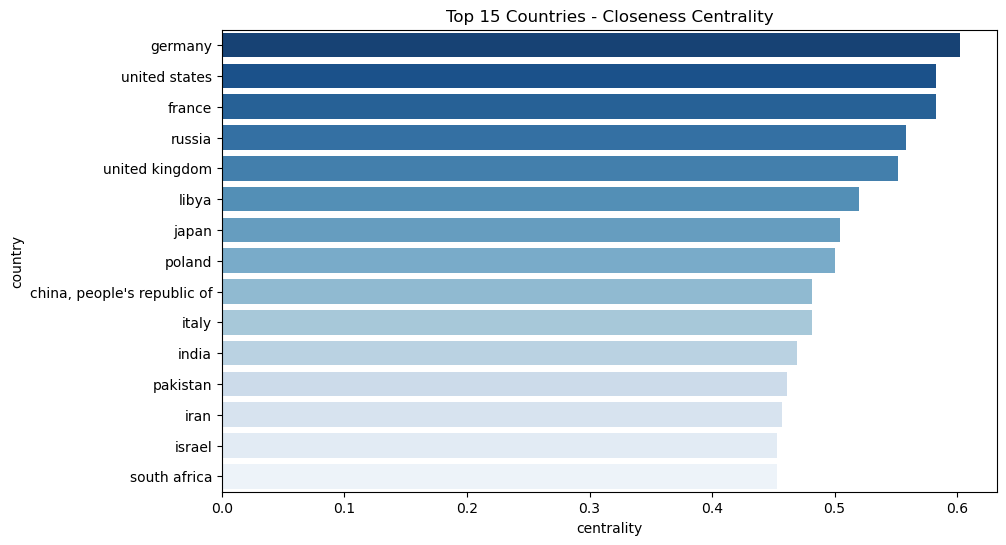

In [45]:
# Plot and save closeness centrality
plt.figure(figsize=(10, 6))
sns.barplot(
    x="centrality",
    y="country",
    data=top_closeness_df,
    palette=colors
).set_title("Top 15 Countries - Closeness Centrality")
plt.savefig(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\closeness_centrality.png",
    bbox_inches='tight'
)
plt.show()


#### Betweenness Centrality

In [39]:
# Calculate betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)

In [40]:
# Convert to dataframe
betweenness_df = pd.DataFrame(
    betweenness_dict.items(),
    columns=['country', 'centrality']
)


In [41]:
# Sort by centrality
betweenness_df.sort_values(
    by='centrality',
    ascending=False,
    inplace=True
)


In [42]:
# Limit to top 15 for readability
top_betweenness_df = betweenness_df.head(15)


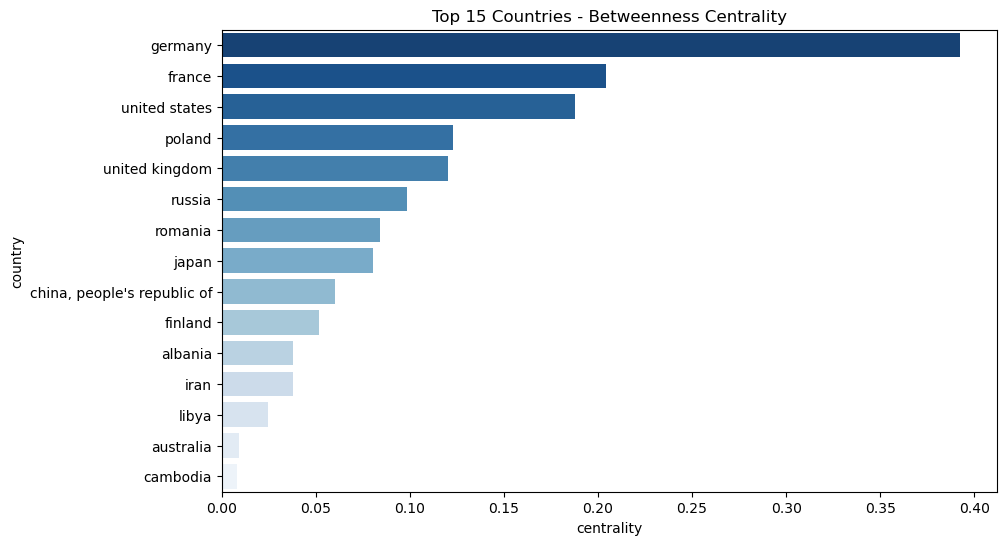

In [46]:
# Plot and save betweenness centrality (dark → light)
colors = sns.color_palette("Blues_r", n_colors=len(top_betweenness_df))

plt.figure(figsize=(10, 6))
sns.barplot(
    x="centrality",
    y="country",
    data=top_betweenness_df,
    palette=colors
).set_title("Top 15 Countries - Betweenness Centrality")
plt.savefig(
    r"C:\Users\Chase\20th-century\Data Visualizations with Python\Achievement 1\04_Analysis\Visualizations\betweenness_centrality.png",
    bbox_inches='tight'
)
plt.show()


#### Save Centrality Measures to Graph

In [47]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')

#### Observations

**Degree centrality:**  
The most connected countries in the network are the United States, Germany, France, the United Kingdom, and China. These countries appear in the most relationships.

**Closeness centrality:**  
The same major countries also have the highest closeness scores, meaning they sit near the center of the network and can reach other countries quickly.

**Betweenness centrality:**  
A few key countries act as bridges between different groups in the network. These countries appear on the shortest paths between others and help connect separate clusters.
